In [0]:
#Optimistising Portfolio of User

In [0]:
#import Libraries for Project
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# getting the fang stocks
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']


In [0]:
# assign weightage to stocks
weights = np.array([0.2, 0.2,0.2, 0.2,0.2])
# getting stocks start date
stockStartDate = '2013-01-01' # first full year for FB
# getting the ending date
stockEndingDate = datetime.today().strftime('%Y-%m-%d')
today = stockEndingDate
today

'2020-06-13'

In [0]:
#Create a data frame to store the adjusted  close price
df = pd.DataFrame()

# storing the adjusted close price into the dataframe
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo', start = stockStartDate, end = today) ['Adj Close']
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-06-08,231.399994,2524.060059,333.459991,419.489990,1446.609985
2020-06-09,238.669998,2600.860107,343.989990,434.049988,1456.160034
2020-06-10,236.729996,2647.449951,352.839996,434.480011,1465.849976


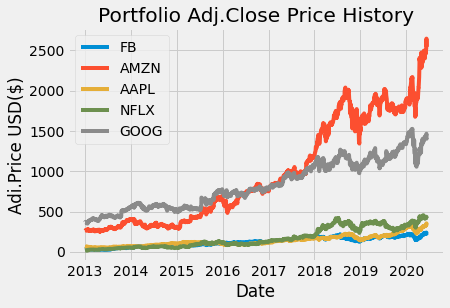

In [0]:
#visualise the portfolio
title = "Portfolio Adj.Close Price History"

my_stocks = df

#Create and plot graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title (title)
plt.xlabel("Date")
plt.ylabel('Adi.Price USD($)')
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [0]:
#show the daily simple returns
returns = df.pct_change()
returns

#create and show annualized Cpvariance matrixc
cov_matrix_annual = returns.cov()* 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116145,0.051889,0.040852,0.053858,0.048586
AMZN,0.051889,0.091627,0.035690,0.060967,0.046446
AAPL,0.040852,0.035690,0.076573,0.031777,0.037347
NFLX,0.053858,0.060967,0.031777,0.212498,0.048533
GOOG,0.048586,0.046446,0.037347,0.048533,0.064766


In [0]:
# calculate portfolio variance
port_variance = np.dot (weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.058939930314422524

In [0]:
#calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.24277547304952887

In [0]:
portfolioSimpleAunnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAunnualReturn

0.34623258300951887

In [0]:
#show annual return, volatility and variance
percent_var = str(round(port_variance,2)* 100) + '%'
percent_vols =  str(round(port_volatility,2) *100 ) + '%'
percent_return = str (round ( portfolioSimpleAunnualReturn,2 ) * 100) +'%'
print ('Expected Annual ReturnL ' + percent_return)
print ('Annual volatility : ' + percent_vols)
print ('Annual variance: ' + percent_var)



Expected Annual ReturnL 35.0%
Annual volatility : 24.0%
Annual variance: 6.0%


In [0]:
PR = percent_return
PVO = percent_vols
PVA = percent_var
print ('Expected Annual ReturnL ' + PR)
print ('Annual volatility : ' + PVO)
print ('Annual variance: ' + PVA)

Expected Annual ReturnL 35.0%
Annual volatility : 24.0%
Annual variance: 6.0%


In [0]:
pip install PyPortfolioOpt


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models
from pypfopt import expected_returns

In [0]:
# optimise portfolio

# calculate expected returns and annualise covariance matrix of assets
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# sharpe ratio optimisation
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print (clean_weights)

OrderedDict([('FB', 0.15934), ('AMZN', 0.29403), ('AAPL', 0.21683), ('NFLX', 0.3298), ('GOOG', 0.0)])


In [0]:
ef.portfolio_performance(verbose = True)

Expected annual return: 40.1%
Annual volatility: 26.8%
Sharpe Ratio: 1.42


(0.40050189556298843, 0.26804621059968187, 1.4195384247802532)

In [0]:
0.15934+0.29403+0.21683+0.3298

1.0

In [0]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = clean_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1500000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation: ' , allocation)

print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation:  {'FB': 1046.0, 'AMZN': 173.0, 'AAPL': 960.0, 'NFLX': 1184.0}
Funds remaining: $373.98
